In [2]:
!git clone https://github.com/guyuxuan9/MML_coursework.git

Cloning into 'MML_coursework'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 68 (delta 6), reused 13 (delta 2), pack-reused 43 (from 1)
Receiving objects: 100% (68/68), 78.50 MiB | 47.76 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
# !pip install --upgrade tf_fourier_features

# Imports

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, AveragePooling1D
import matplotlib.pyplot as plt
import tensorflow as tf
from tf_fourier_features import FourierFeatureProjection
from tf_fourier_features import FourierFeatureMLP

# Dimension 9: Neural Network
### Setup and Training

Training set: (12600, 9) (12600,)
Validation set: (2700, 9) (2700,)
Test set: (2700, 9) (2700,)
Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 45s 79ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.6489 - val_loss: 0.6904
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6956 - loss: 0.6885 - val_accuracy: 0.6411 - val_loss: 0.6856
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.6810 - val_accuracy: 0.7570 - val_loss: 0.6726
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.6627 - val_accuracy: 0.7852 - val_loss: 0.6391
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.6163 - val_accuracy: 0.8381 - val_loss: 0.5508
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.5082 - val_accuracy: 0.9126 - val_loss: 0.4041
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.3626 - val_accuracy: 0.9259 - val_loss: 0.3015
Epoch 

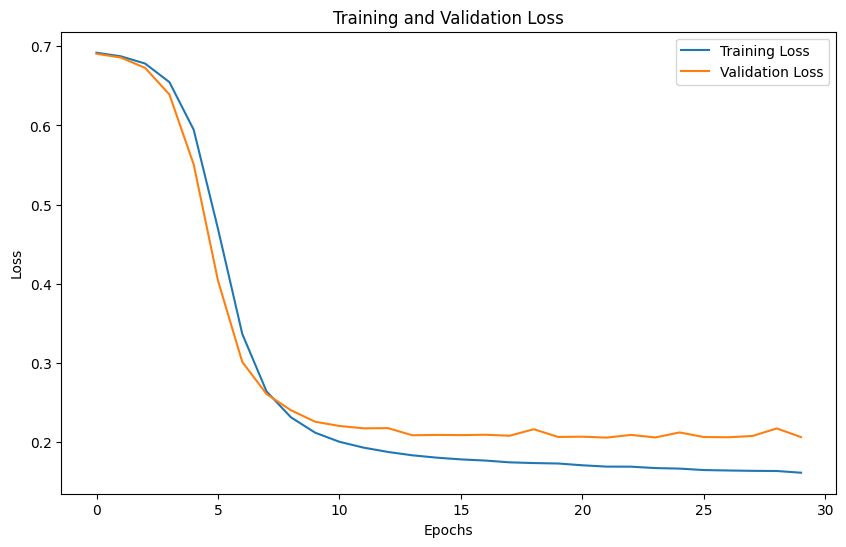

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9573 - loss: 0.1808
Test Loss: 0.1744, Test Accuracy: 0.9589


In [5]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-9-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-9-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=45, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Training set: (12600, 4) (12600,)
Validation set: (2700, 4) (2700,)
Test set: (2700, 4) (2700,)
Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.5041 - val_loss: 0.6931
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5108 - loss: 0.6931 - val_accuracy: 0.5007 - val_loss: 0.6932
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5107 - loss: 0.6930 - val_accuracy: 0.4937 - val_loss: 0.6934
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5081 - val_loss: 0.6931
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5051 - loss: 0.6930 - val_accuracy: 0.5048 - val_loss: 0.6935
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5002 - loss: 0.6932 - val_accuracy: 0.4985 - val_loss: 0.6933
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5047 - loss: 0.6930 - val_accuracy: 0.4985 - val_loss: 0.6934
E

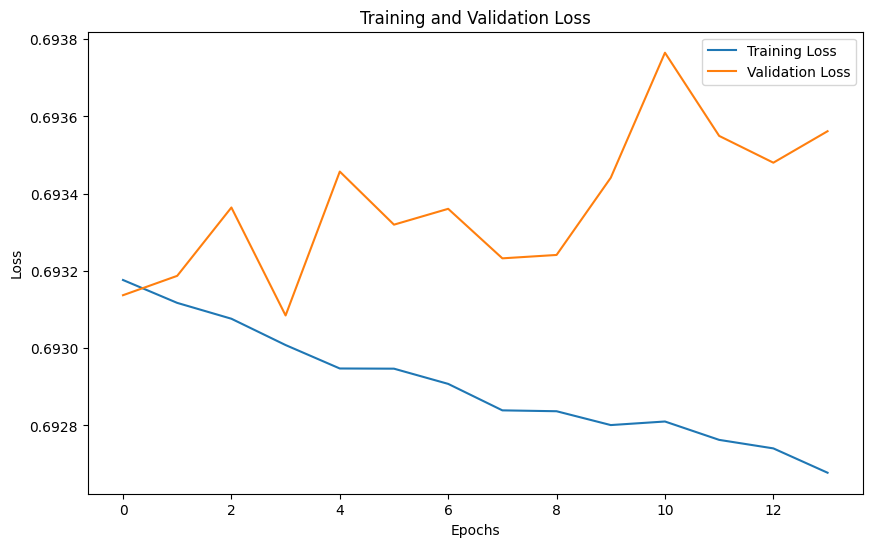

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5021 - loss: 0.6930
Test Loss: 0.6930, Test Accuracy: 0.5019


In [4]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
X = np.load('./Datasets/kryptonite-9-X.npy')
y = np.load('./Datasets/kryptonite-9-y.npy')

# Select features with non-zero mutual information
mi = mutual_info_classif(X, y)
X = X[:, mi > 0]

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with dense layers for binary classification
ip = tf.keras.layers.Input(shape=[X.shape[1]])
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

### Inference
(Run this cell immediately after running training, as the `model` variable is reused in later training runs for different dimensions)


In [6]:
# Load the hidden data
hiddenX = np.load('MML_coursework/Datasets/hidden-kryptonite-9-X.npy')

# Ensure the hidden data is reshaped to match the input dimensions
hiddenX = hiddenX.reshape((hiddenX.shape[0], hiddenX.shape[1], 1))

# Make predictions on the hidden data
hidden_predictions = model.predict(hiddenX, batch_size=32, verbose=1)

# Convert predictions to binary (0 or 1) using a threshold of 0.5
hidden_predictions_binary = (hidden_predictions > 0.5).astype(int)

# Save the predictions
np.save('MML_coursework/Datasets/hidden-kryptonite-9-y.npy', hidden_predictions_binary)

print("Inference on hidden data complete. Predictions saved.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Inference on hidden data complete. Predictions saved.


# Dimension 12: Neural Network
### Setup and Training

Training set: (16800, 12) (16800,)
Validation set: (3600, 12) (3600,)
Test set: (3600, 12) (3600,)
Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.5076 - loss: 0.6935 - val_accuracy: 0.5067 - val_loss: 0.6930
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5022 - loss: 0.6931 - val_accuracy: 0.5031 - val_loss: 0.6929
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5041 - loss: 0.6926 - val_accuracy: 0.5031 - val_loss: 0.6931
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5293 - loss: 0.6912 - val_accuracy: 0.5158 - val_loss: 0.6955
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6321 - loss: 0.6115 - val_accuracy: 0.9019 - val_loss: 0.2685
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1904 - val_accuracy: 0.9575 - val_loss: 0.1732
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9515 - loss: 0.1758 - val_accuracy: 0.9586 - val_loss: 0.1674
Epoch

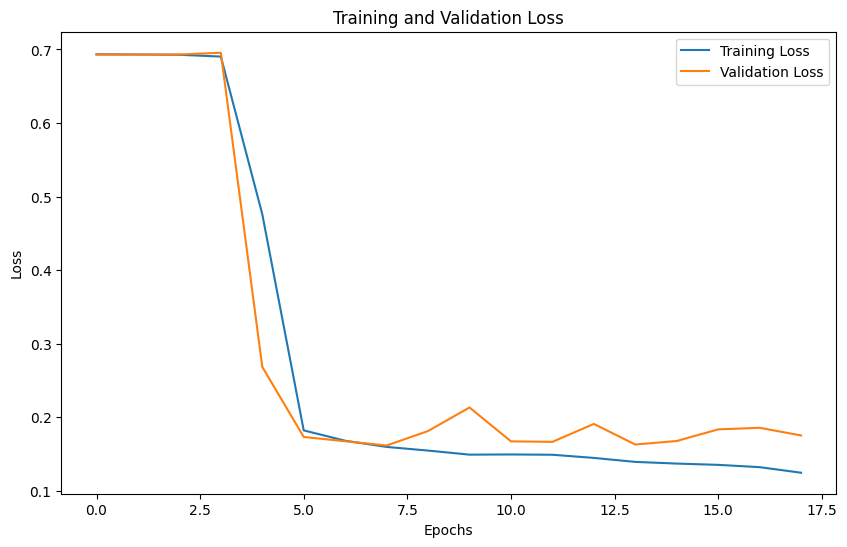

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1472
Test Loss: 0.1601, Test Accuracy: 0.9625


In [7]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-12-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-12-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

### Inference

In [8]:
# Load the hidden data
hiddenX = np.load('MML_coursework/Datasets/hidden-kryptonite-12-X.npy')

# Ensure the hidden data is reshaped to match the input dimensions
hiddenX = hiddenX.reshape((hiddenX.shape[0], hiddenX.shape[1], 1))

# Make predictions on the hidden data
hidden_predictions = model.predict(hiddenX, batch_size=32, verbose=1)

# Convert predictions to binary (0 or 1) using a threshold of 0.5
hidden_predictions_binary = (hidden_predictions > 0.5).astype(int)

# Save the predictions
np.save('MML_coursework/Datasets/hidden-kryptonite-12-y.npy', hidden_predictions_binary)

print("Inference on hidden data complete. Predictions saved.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Inference on hidden data complete. Predictions saved.


# Dimension 15: Neural Network
### Setup and Training

Training set: (21000, 15) (21000,)
Validation set: (4500, 15) (4500,)
Test set: (4500, 15) (4500,)
Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.4992 - loss: 0.6934 - val_accuracy: 0.4969 - val_loss: 0.6933
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5063 - loss: 0.6932 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 3/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5093 - loss: 0.6931 - val_accuracy: 0.4969 - val_loss: 0.6933
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4953 - val_loss: 0.6933
Epoch 5/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5122 - loss: 0.6928 - val_accuracy: 0.5069 - val_loss: 0.6931
Epoch 6/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5156 - loss: 0.6925 - val_accuracy: 0.5064 - val_loss: 0.6945
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5204 - loss: 0.6919 - val_accuracy: 0.5064 - val_loss: 0.6929
Epo

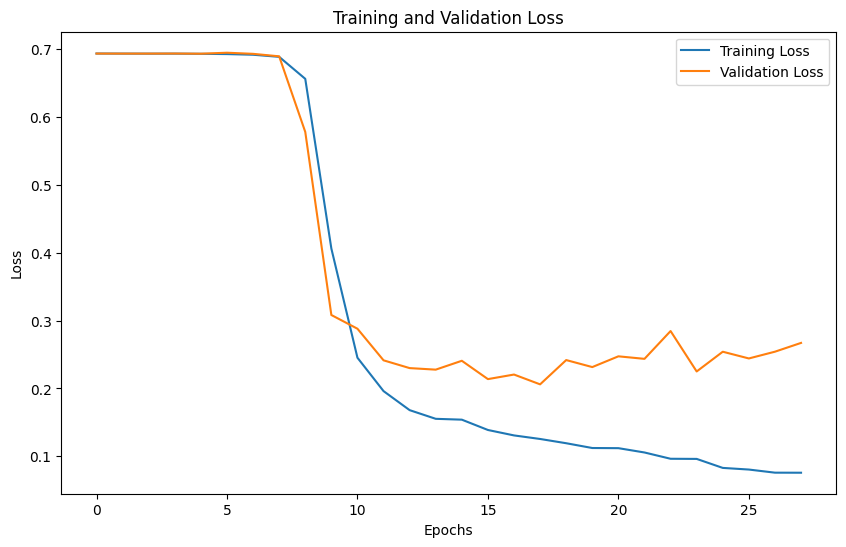

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9267 - loss: 0.2342
Test Loss: 0.2167, Test Accuracy: 0.9333


In [9]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-15-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-15-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(2048, activation='relu')(ip)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

### Inference

In [10]:
# Load the hidden data
hiddenX = np.load('MML_coursework/Datasets/hidden-kryptonite-15-X.npy')

# Ensure the hidden data is reshaped to match the input dimensions
hiddenX = hiddenX.reshape((hiddenX.shape[0], hiddenX.shape[1], 1))

# Make predictions on the hidden data
hidden_predictions = model.predict(hiddenX, batch_size=32, verbose=1)

# Convert predictions to binary (0 or 1) using a threshold of 0.5
hidden_predictions_binary = (hidden_predictions > 0.5).astype(int)

# Save the predictions
np.save('MML_coursework/Datasets/hidden-kryptonite-15-y.npy', hidden_predictions_binary)

print("Inference on hidden data complete. Predictions saved.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Inference on hidden data complete. Predictions saved.


# Fails for Dim 18 and higher

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD

Training set: (25200, 18) (25200,)
Validation set: (5400, 18) (5400,)
Test set: (5400, 18) (5400,)
Epoch 1/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.4945 - loss: 0.6933 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 2/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5051 - loss: 0.6932 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 3/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4926 - val_loss: 0.6932
Epoch 4/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.4926 - val_loss: 0.6932
Epoch 5/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5074 - val_loss: 0.6931
Epoch 6/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.4915 - val_loss: 0.6932
Epoch 7/30
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5067 - loss: 0.6931 - val_accuracy: 0.5054 - val_loss: 0.6931
Epo

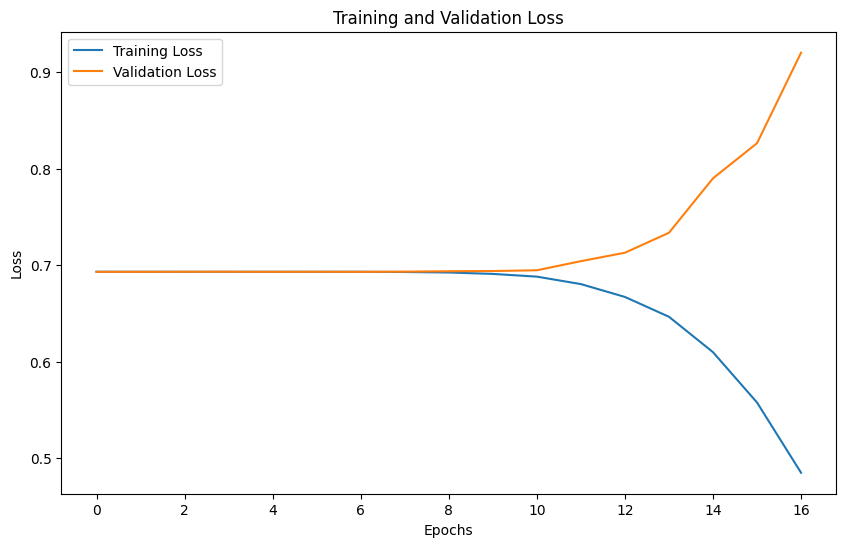

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4929 - loss: 0.6932
Test Loss: 0.6932, Test Accuracy: 0.4944


In [ ]:
# Load data
X = np.load('MML_coursework/Datasets/kryptonite-18-X.npy')
y = np.load('MML_coursework/Datasets/kryptonite-18-y.npy')

# Split into train, validation, and test sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

# Define a neural network with Fourier feature projection and dense layers for binary classification

ip = tf.keras.layers.Input(shape=[X.shape[1]])
# https://arxiv.org/pdf/2006.10739
# x = FourierFeatureProjection(gaussian_projection=15, gaussian_scale=0.5)(ip)
x = tf.keras.layers.Dense(128, activation='relu')(ip)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

model = tf.keras.Model(inputs=ip, outputs=output)

# Reshape X to add a channel dimension
X = X.reshape((X.shape[0], X.shape[1], 1))

# Compile the model with binary cross-entropy loss and accuracy metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Plot the loss curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set for loss and accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")